In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)

print(tf.__version__)


2.15.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


MODEL A - CAŁOŚĆ DANYCH

In [2]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
12418555,1.0,7.0,0.996528,0.0
12418556,1.0,7.0,0.997222,0.0
12418557,1.0,7.0,0.997917,0.0
12418558,1.0,7.0,0.998611,0.0


In [4]:
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

In [6]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
77616/77616 [==============================] - 61s 776us/step - loss: 0.7057 - mae: 0.1647
Epoch 2/5
77616/77616 [==============================] - 61s 780us/step - loss: 0.7045 - mae: 0.1642
Epoch 3/5
77616/77616 [==============================] - 59s 761us/step - loss: 0.7045 - mae: 0.1642
Epoch 4/5
77616/77616 [==============================] - 59s 760us/step - loss: 0.7045 - mae: 0.1642
Epoch 5/5
77616/77616 [==============================] - 60s 769us/step - loss: 0.7045 - mae: 0.1642


In [7]:
model.evaluate(x_test, y_test, batch_size=128)

19404/19404 [==============================] - 12s 600us/step - loss: 0.7079 - mae: 0.1779


[0.7079479098320007, 0.17792056500911713]

113/113 [==============================] - 0s 666us/step


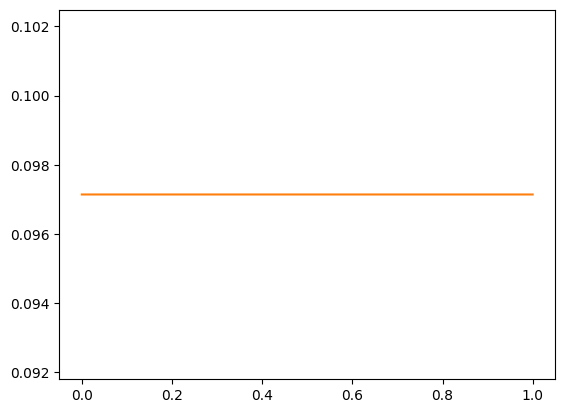

In [8]:
flow_time=np.arange(0,1,1/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time, flow_result)

MODEL B - TYLKO JEDEN DZIEŃ TYGODANIA


PONIEDZIAŁEK

Epoch 1/5
11088/11088 [==============================] - 53s 5ms/step - loss: 0.9035 - mae: 0.1906
Epoch 2/5
11088/11088 [==============================] - 51s 5ms/step - loss: 0.8291 - mae: 0.1861
Epoch 3/5
11088/11088 [==============================] - 52s 5ms/step - loss: 0.8291 - mae: 0.1860
Epoch 4/5
11088/11088 [==============================] - 52s 5ms/step - loss: 0.8291 - mae: 0.1860
Epoch 5/5
113/113 [==============================] - 0s 1ms/step


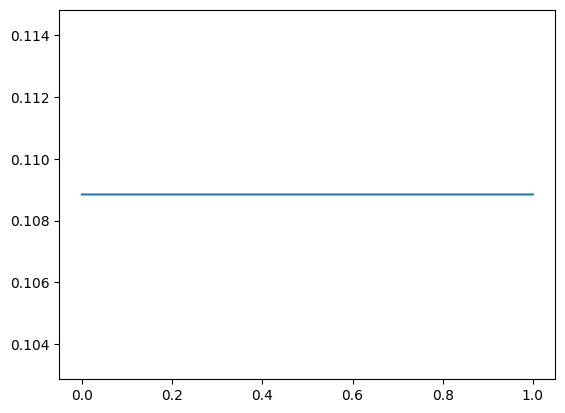

In [9]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset=dataset.drop(columns="Pora_roku")
dataset = dataset[dataset['Dzien_tygodnia'] == 1]

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
x=x.drop(columns="Dzien_tygodnia")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1024, activation='relu', input_shape=(1,)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_pon=np.arange(0,1,1/3600) 
flow_result_pon = model.predict(flow_time_pon)

plt.plot(flow_time_pon, flow_result_pon)

WTOREK

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset=dataset.drop(columns="Pora_roku")
dataset = dataset[dataset['Dzien_tygodnia'] == 2]

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
x=x.drop(columns="Dzien_tygodnia")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1024, activation='relu', input_shape=(1,)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_wt=np.arange(0,1,1/3600) 
flow_result_wt = model.predict(flow_time_wt)

plt.plot(flow_time_wt, flow_result_wt)

ŚRODA

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset=dataset.drop(columns="Pora_roku")
dataset = dataset[dataset['Dzien_tygodnia'] == 3]

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
x=x.drop(columns="Dzien_tygodnia")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1024, activation='relu', input_shape=(1,)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_sr=np.arange(0,1,1/3600) 
flow_result_sr = model.predict(flow_time_sr)   

plt.plot(flow_time_sr, flow_result_sr)

CZWARTEK

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset=dataset.drop(columns="Pora_roku")
dataset = dataset[dataset['Dzien_tygodnia'] == 4]

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
x=x.drop(columns="Dzien_tygodnia")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1024, activation='relu', input_shape=(1,)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_czw=np.arange(0,1,1/3600) 
flow_result_czw = model.predict(flow_time_czw)   

plt.plot(flow_time_czw, flow_result_czw)

PIĄTEK

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11088/11088 [==============================] - 12s 1ms/step - loss: 0.6332 - mae: 0.1623
Epoch 2/5
11088/11088 [==============================] - 11s 1ms/step - loss: 0.6251 - mae: 0.1581
Epoch 3/5
11088/11088 [==============================] - 11s 1ms/step - loss: 0.6251 - mae: 0.1581
Epoch 4/5
11088/1

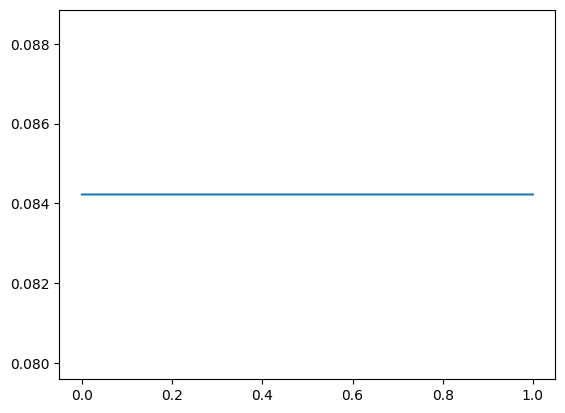

In [76]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset=dataset.drop(columns="Pora_roku")
dataset = dataset[dataset['Dzien_tygodnia'] == 5]

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
x=x.drop(columns="Dzien_tygodnia")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(1,)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_pt=np.arange(0,1,1/3600) 
flow_result_pt = model.predict(flow_time_pt)   

plt.plot(flow_time_pt, flow_result_pt)

SOBOTA

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset=dataset.drop(columns="Pora_roku")
dataset = dataset[dataset['Dzien_tygodnia'] == 6]

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
x=x.drop(columns="Dzien_tygodnia")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1024, activation='relu', input_shape=(1,)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_sob=np.arange(0,1,1/3600) 
flow_result_sob = model.predict(flow_time)   

plt.plot(flow_time_sob, flow_result_sob)

NIEDZIELA

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset=dataset.drop(columns="Pora_roku")
dataset = dataset[dataset['Dzien_tygodnia'] == 7]

dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
x=x.drop(columns="Dzien_tygodnia")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1024, activation='relu', input_shape=(1,)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_dn=np.arange(0,1,1/3600) 
flow_result_dn = model.predict(flow_time)   

plt.plot(flow_time_dn, flow_result_dn)